# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the Census Data Set -- named as adultDataSet_filename.
2. Initially, I thought would I would predict whether an individual's income is above or below $50,000 per year, however the column was an object dat type that did not work with KNN algorithm.

    Now, I am predicting the age of a working individual. 

3. This is an example of supervised learning and regression problem. This is because we use exisiting labeled datasets to train algos to predict patterns, and the age is a numerical value that we are predicting, thus it is a regression problem.

4. The features are all the other columns expect for the label (age). Some of the columns include: 'fnlwgt', 'education-num', and 'capital-gain'. To be entirely honest, I don't really know what 'fnlwgt' is supposed to represent or reflects as a numerical data, but it seems significant.

5. Determining what age demographics or factors relating to age like work or class, companies and organizations can use this model to understand the age distribution of their employees better and plan products and working conditions, or use age information to create susseful marketing campaigns, and training programs, and succession planning.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [4]:
#check for null values in any of the columns
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [5]:
#check values in income binary 
df['age'].value_counts()

36.0    895
31.0    886
34.0    883
23.0    872
33.0    868
       ... 
83.0      6
88.0      3
85.0      3
86.0      1
87.0      1
Name: age, Length: 73, dtype: int64

In [6]:
# drop any null values from set
df = df.dropna()
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64

In [7]:
exclude = list(df.select_dtypes(include=['object']).columns)
print(exclude)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country', 'income_binary']


In [8]:
df.drop(columns = exclude, axis = 1, inplace=True)

In [9]:
df.shape

(29716, 6)

In [10]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Cutting down from the original list of features, initially I only dropped the label column and had the remaining columns as features, however it did not work as many of the features were of an 'object' data type. The 'object' data type caused a "ValueError: could not convert string to float: 'Private'" when working with the training function for KNN. 

Realizing this, I dedcided to change my label and features, to then focus on predicting age and significantly cut down the list of features. As I still, wanted to use KNN for my model. 

KNN is one of the simplest and standard models used for used for both classification and regression problems. Since I am predicting age, this is using KNN for regression.

To use and trian the model, I will follow similar steps as to previous assingments. First, we need to split the the data set, so that part of it is for training and the other will be used for validation -- hence the test_size = 0.33. Then I will use SciKit Learn's KNeighborsClassifier in order to declare a KNeighborsClassifier object within my trianing function, where I also fit the model to the data and call the prediction function. 

To evaluate the model, I will look at a variety of k values to find which value and range provides the best k value for predicting age within the census dataset. 


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [12]:
y = df['age']
X = df.drop(columns = 'age', axis=1)
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 29716

Number of Features:5
['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=1234)

In [14]:
print(X_train.shape)
print(X_test.shape)

(19909, 5)
(9807, 5)


In [15]:
X_test.head()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
17043,89508,10,0,0,50.0
30921,175029,9,0,0,40.0
23848,241928,9,0,0,32.0
32025,139703,10,0,0,40.0
15738,37210,13,0,0,45.0


In [16]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    # 1. KNeighborsClassifier model object below and set to 'model'
    n_neighbor = k
    model = KNeighborsClassifier(n_neighbor)
    
    # 2. fit the model to training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and set to the 'class_label_predictions'
    class_label_predictions = model.predict(X_test)
    
    # 4. Find accuracy score 
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

In [17]:
set1_k_values = [1, 10, 20]
acc1 = []
for k in set1_k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))

k=1, accuracy score: 0.07861731416335271
k=10, accuracy score: 0.038645865198327724
k=20, accuracy score: 0.03833996125216682


In [18]:
set2_k_values = [1, 10, 100]
acc2 = []
for k in set2_k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2.append(float(score))

k=1, accuracy score: 0.07861731416335271
k=10, accuracy score: 0.038645865198327724
k=100, accuracy score: 0.03589272968287958


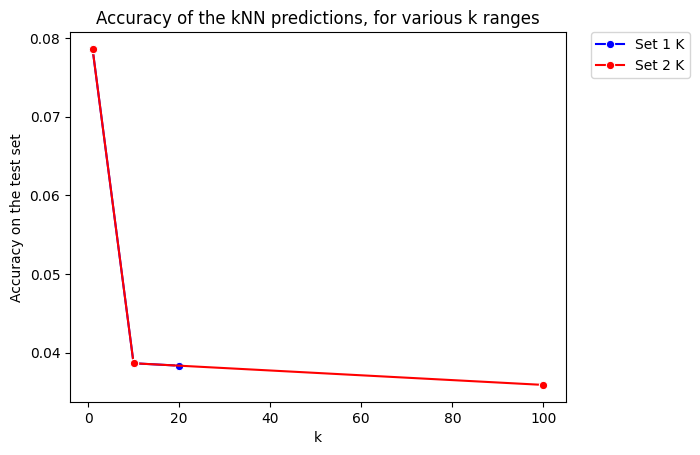

In [19]:
#plotting the graph
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.lineplot(x=set1_k_values, y=acc1, color='b', marker='o', label = 'Set 1 K')
p2 = sns.lineplot(x=set2_k_values, y=acc2, color='r', marker='o', label = 'Set 2 K')


plt.title('Accuracy of the kNN predictions, for various k ranges')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

In [20]:
set3_k_values = [100, 500, 1000]
acc3 = []
for k in set3_k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc3.append(float(score))

k=100, accuracy score: 0.03589272968287958
k=500, accuracy score: 0.033445498113592334
k=1000, accuracy score: 0.03140613847251963


In [21]:
set4_k_values = [1, 2, 3]
acc4 = []
for k in set4_k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc4.append(float(score))

k=1, accuracy score: 0.07861731416335271
k=2, accuracy score: 0.06842051595798919
k=3, accuracy score: 0.057815845824411134


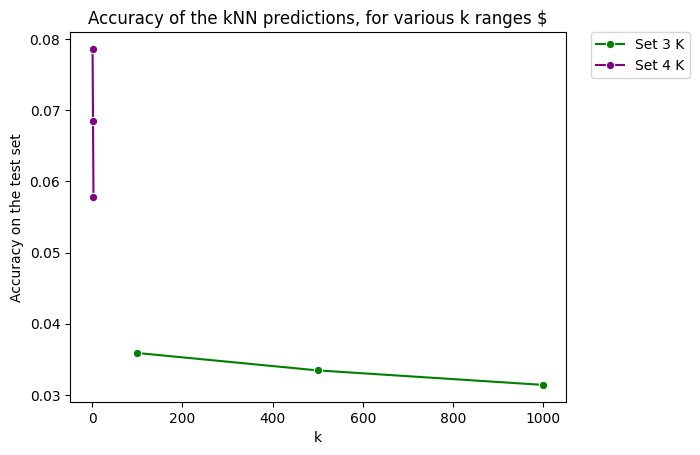

In [22]:
#plotting the graph
fig = plt.figure()
ax = fig.add_subplot(111)
p3 = sns.lineplot(x=set3_k_values, y=acc3, color='g', marker='o', label = 'Set 3 K')
p4 = sns.lineplot(x=set4_k_values, y=acc4, color='purple', marker='o', label = 'Set 4 K')

plt.title('Accuracy of the kNN predictions, for various k ranges $')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()


Similar to what we did in previosuly for using KNN, I started out with sets of three k values ot use and plotted grpahs accourdingdly. Each test was a varying k values and ranges between them, and the grpahs plotted 3 points. This made it somewhat easier to visualize hwo this ranges were scaled in comparison to each other

In [23]:
acc_50 = []
print("Accuracy scores for full training data:")
for k in range(1,51):
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k =' + str(k) + ', accuracy score: ' + str(score))
    acc_50.append(float(score))

Accuracy scores for full training data:
k =1, accuracy score: 0.07861731416335271
k =2, accuracy score: 0.06842051595798919
k =3, accuracy score: 0.057815845824411134
k =4, accuracy score: 0.050474151116549404
k =5, accuracy score: 0.04649739981645763
k =6, accuracy score: 0.04557968797797492
k =7, accuracy score: 0.043744264301009486
k =8, accuracy score: 0.041602936677883146
k =9, accuracy score: 0.03874783318038136
k =10, accuracy score: 0.038645865198327724
k =11, accuracy score: 0.0391557051085959
k =12, accuracy score: 0.03783012134189864
k =13, accuracy score: 0.03874783318038136
k =14, accuracy score: 0.03833996125216682
k =15, accuracy score: 0.038441929234220455
k =16, accuracy score: 0.038441929234220455
k =17, accuracy score: 0.03813602528805955
k =18, accuracy score: 0.03813602528805955
k =19, accuracy score: 0.03772815335984501
k =20, accuracy score: 0.03833996125216682
k =21, accuracy score: 0.03874783318038136
k =22, accuracy score: 0.038645865198327724
k =23, accuracy 

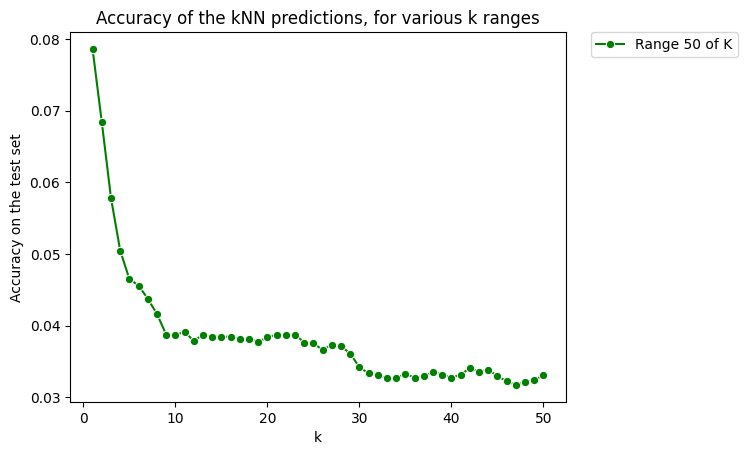

In [28]:
#plotting the graph
x = [i for i in range(1,51)]
fig = plt.figure()
ax = fig.add_subplot(111)
p3 = sns.lineplot(x=[i for i in range(1,51)], y=acc_50, color='g', marker='o', label = 'Range 50 of K')


plt.title('Accuracy of the kNN predictions, for various k ranges')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

Ultimately, I found that the lower values of k result in the most accuracy, as even the changes from k=1 to k=2 and k=3 lead to a steed drop in accuracy. Given that the KNN model requires the inputs/ k values to be integers [1, infinty), k=1 had the best accuracy score of accuracy score: 0.07861731416335271. Roughly once k=10 and onwards, the graph above shows how theres is a less drastic change in accuracy score, but it is still relatively low averaging around 0.033~ 0.032. 

The best k value= 1 for predicting age may be becuase the model basically memorizes the training data, which can cause overfiting and be difficult when using it on unseen data. Thus it is probabby better to use a k value of 5 or 4, which reuslts in an accuracy score of 0.04649739981645763, which is close to half accurate. 

To further improve the model, I could try looking at a different column as the feature as oppsoed to age, which may give more correlation to a more impactful result. Or, instead of using KNN I could use a form of neural networks which would allow the model to follow a non-linear pattern instead of the assumed linear relationship. This would be more complexm but more accurate. 

However, overall I am glad that I got to refresh and use KNN modeling as I find it coming up mor eand more in certain projects outside of BreakThrough Tech and it is clearly and essential model/skill when using ML. 